Alice Giot

#  lmapr1492 : Tâche 7

In [47]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib import pyplot
from IPython.display import HTML, display
from pymatgen import Structure

### Téléchargement du fichier CIF Cs2O

In [48]:
#pour télécharger le ﬁchier CIF du matériau qui vous a été attribué
with MPRester("WNdO6TZG8SzgeuFt") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-7988")
    
    w = CifWriter(structure,symprec=1e-5);
    w.write_file('Cs2O.cif')
structure = Structure.from_file("Cs2O.cif")

### Détermination des 3 premiers pics du diffactogramme correspondant pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å

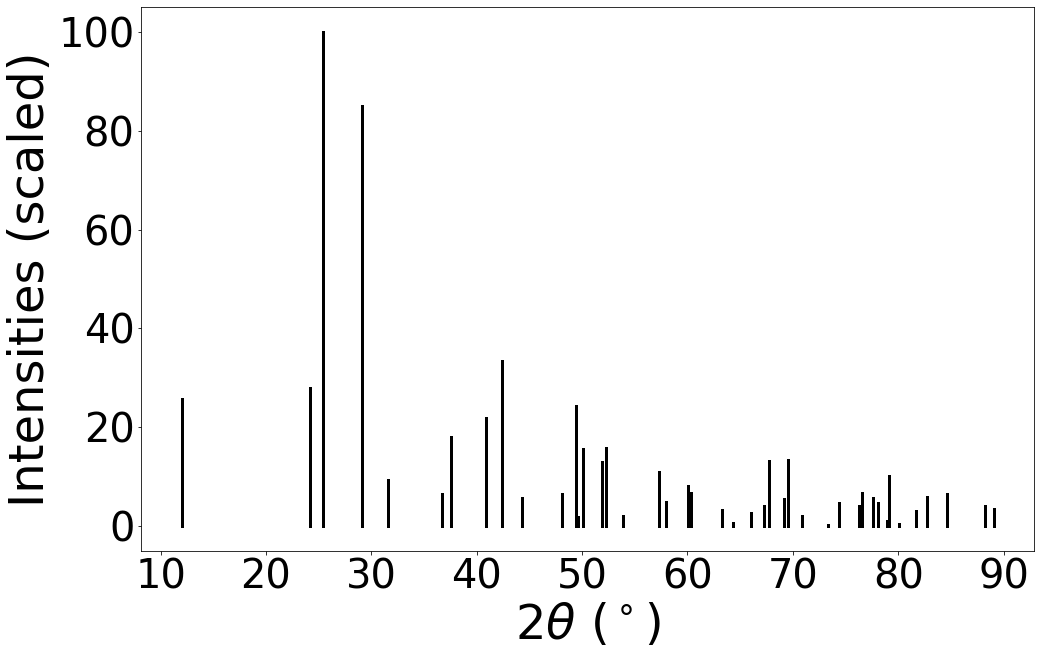

Premier pic :
--------------- 
Indices hkl associés : (0, 0, 0, 3)
2θ : 12.040837545981645 °
Amplitude : 25.80245035551468


Deuxième pic :
--------------- 
Indices hkl associés : (0, 0, 0, 6)
2θ : 24.217250888373364 °
Amplitude : 28.018558821284003


Troisième pic :
--------------- 
On ne considère pas la troisième raie du spectre car son intensité est beaucoup plus faible que celles des raies voisines ( 0.05567930317166681 ) et est sans doute due à une interférence parasite. On considère donc la quatrième raie à la place. 
Indices hkl associés : (1, 0, -1, 2)
2θ : 25.450872672756788 °
Amplitude : 100.00000000000001




In [53]:
#Création de l'objet calculateur XRD
xrd = XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)

#Prise des données
pattern = xrd.get_pattern(structure, scaled=True, two_theta_range=(0, 90))

#Indices hkl associés
hkl = pattern.hkls

#2theta associés
theta = pattern.x

#Amplitude associée
amplitude = pattern.y

#Affiche le diffractogramme correspondant pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å
xrd.show_plot(structure,annotate_peaks=False)

#Affiche les données des 3 premiers pics
print("Premier pic :")
print('--------------- ')
print("Indices hkl associés :", hkl[0][0]["hkl"])
print('2\u03B8 :',theta[0],"°")
print("Amplitude :", amplitude[0])
print("\n")

print("Deuxième pic :")
print('--------------- ')
print("Indices hkl associés :", hkl[1][0]["hkl"])
print('2\u03B8 :',theta[1],"°")
print("Amplitude :", amplitude[1])
print("\n")

print("Troisième pic :")
print('--------------- ')
print("On ne considère pas la troisième raie du spectre car son intensité est beaucoup plus faible que celles des raies voisines (", amplitude[2],") et est sans doute due à une interférence parasite. On considère donc la quatrième raie à la place. ")
print("Indices hkl associés :", hkl[3][0]["hkl"])
print('2\u03B8 :',theta[3],"°")
print("Amplitude :", amplitude[3])
print("\n")

### Représentation uniquement des 3 premiers pics (en réalité 4 mais on ne considère pas le 3ème):

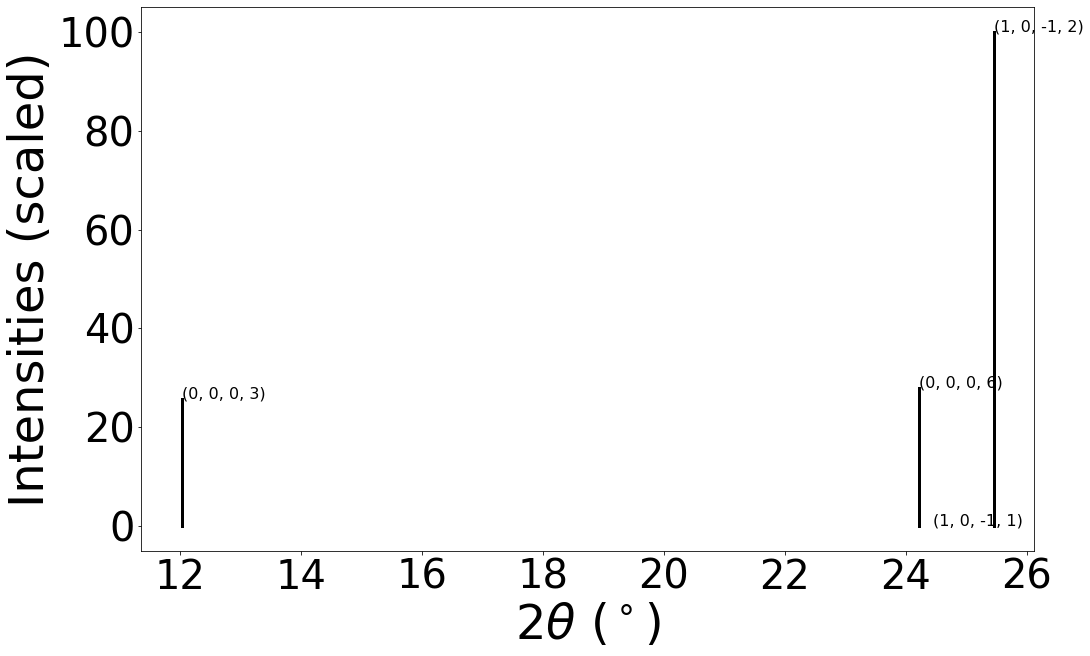

In [50]:
#Affiche des 3 premiers pics du diffractogramme correspondant pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å
xrd.show_plot(structure,two_theta_range=(0,26),annotate_peaks=True)